**Install dependencies**

In [ ]:
# %%capture
# !pip install -U pillow numpy pandas
# !pip install -U cjm_pil_utils cjm_parallel_utils

**Import dependencies**

In [ ]:
import random
from pathlib import Path
from functools import partial

from PIL import Image
import numpy as np

import pandas as pd
pd.set_option('max_colwidth', None)  # Do not truncate the contents of cells in the DataFrame
pd.set_option('display.max_rows', None)  # Display all rows in the DataFrame
pd.set_option('display.max_columns', None)  # Display all columns in the DataFrame

from cjm_pil_utils.core import get_img_files, stack_imgs, avg_images
from cjm_parallel_utils.core import parallel

**Set path to first image dataset**

In [ ]:
img_dataset_path_1 = Path(f"/mnt/980_1TB_2/Datasets/Pexels_Full_768p/")

**Set path to images folder**

In [ ]:
img_dir_1 = Path(img_dataset_path_1/"images/")

**Get image file paths**

In [ ]:
# Get a list of the paths to the images in the images directory
img_paths_1 = get_img_files(img_dir_1)

# Print the number of images in the images directory
print(len(img_paths_1))

109971


**Map image IDs to file paths**

In [ ]:
# Create a dictionary mapping image IDs to image paths
img_path_dict_1 = {int(path.stem.split('-')[-1]) : path for path in img_paths_1}

# Display the first few entries in the dictionary using a Pandas Dataframe
pd.DataFrame.from_dict(img_path_dict_1, orient='index').head()

,0
1000026,/mnt/980_1TB_2/Datasets/Pexels_Full_768p/images/1000026.jpeg
1000037,/mnt/980_1TB_2/Datasets/Pexels_Full_768p/images/1000037.jpeg
1000044,/mnt/980_1TB_2/Datasets/Pexels_Full_768p/images/1000044.jpeg
1000054,/mnt/980_1TB_2/Datasets/Pexels_Full_768p/images/1000054.jpeg
1000056,/mnt/980_1TB_2/Datasets/Pexels_Full_768p/images/1000056.jpeg


**Set path to second image dataset**

In [ ]:
img_dataset_path_2 = Path(f"/mnt/980_1TB_2/Datasets/Pexels_Full_768p-leres/")

**Set path to images folder**

In [ ]:
img_dir_2 = Path(img_dataset_path_2/"images/")

**Get image file paths**

In [ ]:
# Get a list of the paths to the images in the images directory
img_paths_2 = get_img_files(img_dir_2)

# Print the number of images in the images directory
print(len(img_paths_2))

109971


**Map image IDs to file paths**

In [ ]:
# Create a dictionary mapping image IDs to image paths
img_path_dict_2 = {int(path.stem.split('-')[-1]) : path for path in img_paths_2}

# Display the first few entries in the dictionary using a Pandas Dataframe
pd.DataFrame.from_dict(img_path_dict_2, orient='index').head()

,0
1000026,/mnt/980_1TB_2/Datasets/Pexels_Full_768p-leres/images/1000026.jpeg
1000037,/mnt/980_1TB_2/Datasets/Pexels_Full_768p-leres/images/1000037.jpeg
1000044,/mnt/980_1TB_2/Datasets/Pexels_Full_768p-leres/images/1000044.jpeg
1000054,/mnt/980_1TB_2/Datasets/Pexels_Full_768p-leres/images/1000054.jpeg
1000056,/mnt/980_1TB_2/Datasets/Pexels_Full_768p-leres/images/1000056.jpeg


**Get image IDs**

In [ ]:
img_ids = list(img_path_dict_2.keys())
len(img_ids)

109971

**Display sample images**

Image ID: 2057403


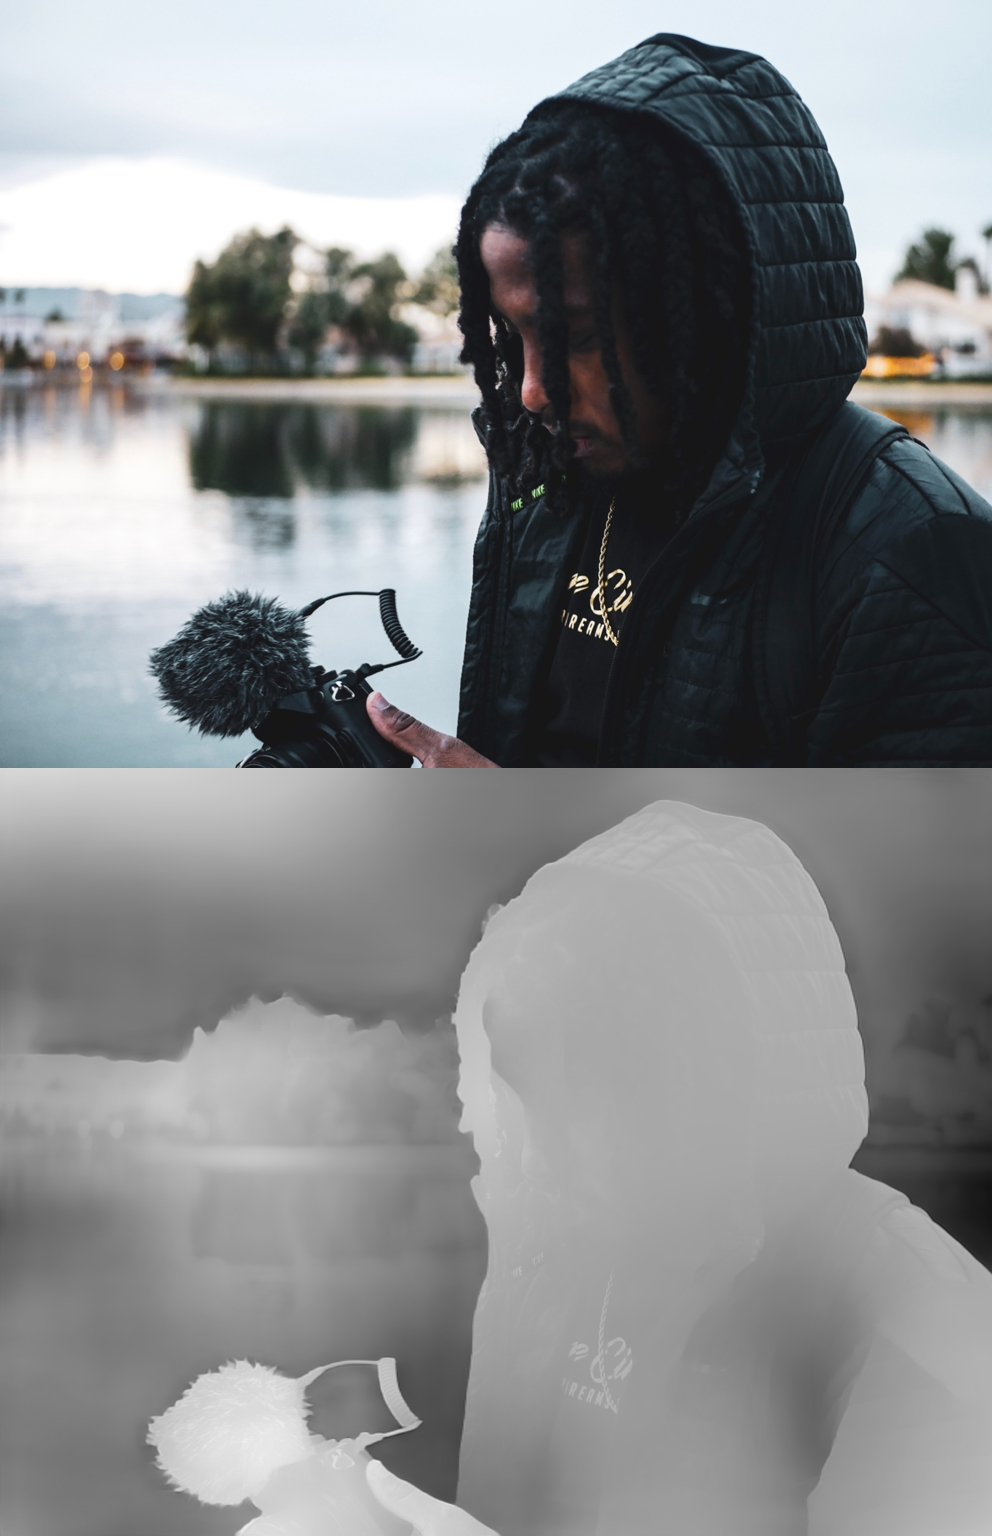

In [ ]:
# Choose a random image ID from the list of image IDs
img_id = random.choice(img_ids)

print(f"Image ID: {img_id}")

# Open the image located at the path in the img_path_dict with the key of the current img_id
sample_img_1 = Image.open(img_path_dict_1[img_id])

sample_img_2 = Image.open(img_path_dict_2[img_id])

avg_img = avg_images(sample_img_1.convert("L"), sample_img_2.convert("L"), 0.1)
stack_imgs([sample_img_1, avg_img])

**Define funtion that averages two images and saves the result to disk**

In [ ]:
def array_func(img_id, img_path_dict_1, img_path_dict_2, save_dir, weight=0.5, quality=100):
    """
    This function takes an image id, two dictionaries of image paths, save directory, weight and quality as input
    and saves the average of two images in the save directory.
    
    Parameters:
    img_id (int): Image id
    img_path_dict_1 (dict): Dictionary of image paths, where key is the image id and value is the image path
    img_path_dict_2 (dict): Dictionary of image paths, where key is the image id and value is the image path
    save_dir (str): Path to the directory where the averaged image will be saved
    weight (float): Weightage given to the first image while averaging (default=0.5)
    quality (int): Quality of the saved image (default=100)
    
    Returns:
    None
    """
    
    # Open the images using the image id
    img_1 = Image.open(img_path_dict_1[img_id])
    img_2 = Image.open(img_path_dict_2[img_id])
    
    # Calculate the weighted average of the two images
    avg_img = avg_images(img_1.convert('L'), img_2.convert('L'), weight=weight)
    
    # Save the averaged image
    save_path = Path(save_dir/f"avg-{img_id}.{img_1.format.lower()}")
    avg_img.save(save_path, img_1.format, quality=quality)

**Define save directory**

In [ ]:
# Create a `Path` object for the directory that will be used to save the images.
save_dir = Path(f"{img_dataset_path_1.parent}/{img_dataset_path_1.stem}-depth-avg/images")

# Create the directory if it does not already exist.
save_dir.mkdir(parents=True, exist_ok=True)

# Print the `Path` object for the save directory.
save_dir

PosixPath('/mnt/980_1TB_2/Datasets/Pexels_Full_768p-depth-avg/images')

**Test array function**

In [ ]:
array_func(img_id, img_path_dict_1, img_path_dict_2, save_dir, weight=0.05)

In [ ]:
stop

NameError: name 'stop' is not defined

**Call `array_func` for every image ID**

In [ ]:
# Create a partial function with some parameters fixed
partial_func = partial(array_func, 
                       img_path_dict_1=img_path_dict_1, 
                       img_path_dict_2=img_path_dict_2,
                       save_dir=save_dir, 
                       weight=0.05)

# Execute the partial function in parallel over the 'img_ids' list
parallel(func=partial_func, arr=img_ids)